*Dorian Trabichet 3A MFEE MSN*: Assimilation de données

## Homework 2: How will the bore propagate ?



sig= 1 sigr= 10
======= Experiment0 =======


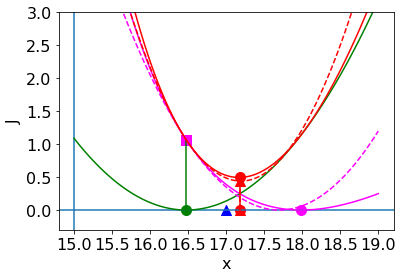

======= Experiment1 =======


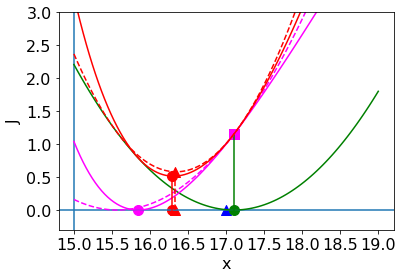

======= Experiment2 =======


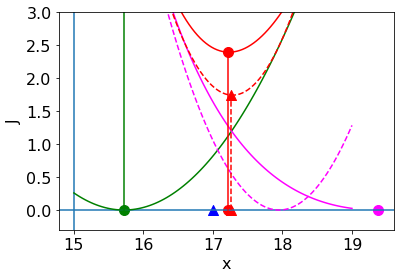

======= Experiment3 =======


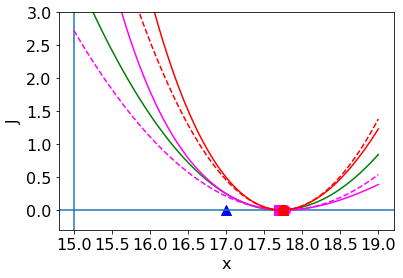

======= Experiment4 =======


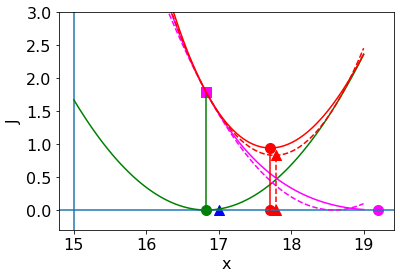

======= Experiment5 =======


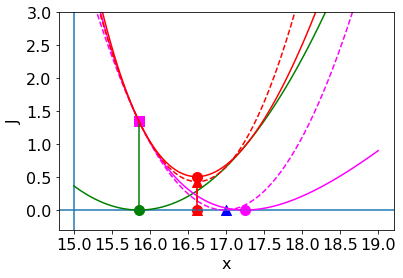

======= Experiment6 =======


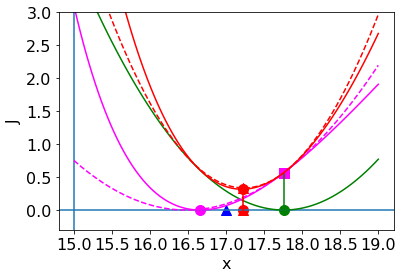

======= Experiment7 =======


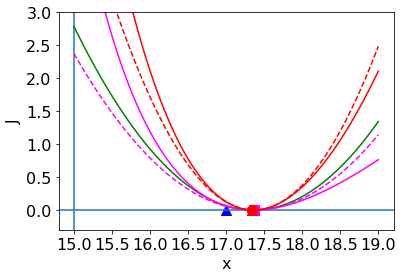

======= Experiment8 =======


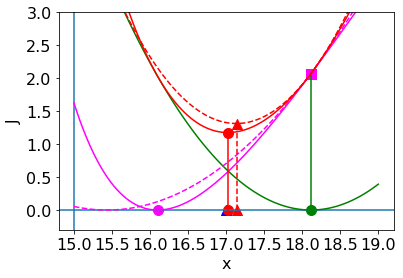

======= Experiment9 =======


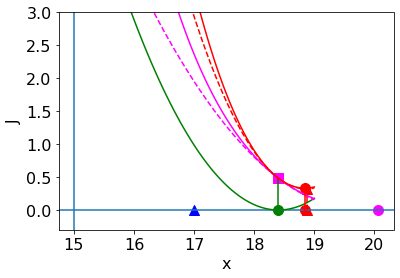

Close all figures to stop the program


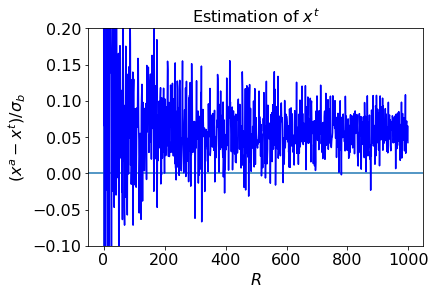

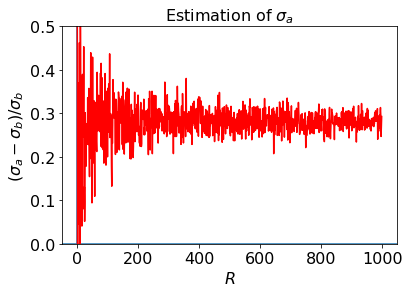

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Nov  3 18:48:59 2019
@author: Olivier THUAL

How will the bore propagate ?
Data assimilation with two informations linked by G

"""
#  clear all
for iglob in list(globals().keys()):
    if(iglob[0] != '_'):
        exec('del {}'.format(iglob))
# import libraries
import numpy as np
import matplotlib.pyplot as plt
              

plt.close('all')

def cG_nol(x):
    # Observation operator
    y=-q/(x-hL)
    return y

def G_lin(x):
    # Observation operator
    cGp=q/(x-hL)**2
    return cGp

def inifig(xaxe=0,yaxe=0,xlab='x',ylab='y'):
    plt.figure()
    plt.axvline(xaxe)
    plt.axhline(yaxe)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(xlab,fontsize=16 )
    plt.ylabel(ylab,fontsize=16)
    
def Jb_cost(x):
    return (x-xb)**2/(2*sigb**2)
 
def Jr_cost(x):
    return (yo-cG_nol(x))**2/(2*sigr**2)

def Jrinc_cost(x):
    d=yo-cG_nol(xb); G=G_lin(xb)
    return (d-G*(x-xb))**2/(2*sigr**2)

def Jinc_cost(x):
    return Jb_cost(x)+Jrinc_cost(x)

def J_cost(x):
    return Jb_cost(x)+Jr_cost(x)

    

# Parameters
q, hL = 500, 10 # Flux, height Left
xt=17; yt=cG_nol(xt) # True state
sigb=1;  sigr=10; 
print('sig=',sigb,'sigr=',sigr)

# Plotting the cost functions
if True :
    R=10
    xmin=15; xmax=19; 
    x=np.linspace(xmin,xmax,100)
    for r in range(R):
        # Background and Measurement
        xb=xt+np.random.normal(0,sigb)
        yo=yt+np.random.normal(0,sigr)
        inifig(xaxe=xmin,ylab='J')
        # True state
        plt.scatter(xt,0,marker='^',color='blue',s=100)
        # plotting Jb
        Jb=Jb_cost(x)
        plt.plot(x,Jb,color='green')
        plt.scatter(xb,0,marker='o',color='green',s=100)
        Jb=J_cost(xb)
        plt.scatter(xb,Jb,marker='s',color='green',s=100)
        plt.plot([xb,xb],[0,Jb],color='green')
        # plotting Jr
        Jr=Jr_cost(x)
        plt.plot(x,Jr,color='magenta')
        xo=hL-q/yo
        plt.scatter(xo,0,marker='o',color='magenta',s=100)
        # plotting Jrinc
        Jrinc=Jrinc_cost(x)
        Jrincb=Jrinc_cost(xb)
        plt.plot(x,Jrinc,color='magenta',linestyle='dashed')
        plt.scatter(xb,Jrincb,marker='s',color='magenta',s=100)
        # plotting J
        J=J_cost(x)
        ixa=np.argmin(J); xa=x[ixa]; Ja=J[ixa]
        plt.plot(x,J,color='red')
        plt.scatter(xa,Ja,marker='o',color='red',s=100)
        plt.scatter(xa,0,marker='o',color='red',s=100)
        plt.plot([xa,xa],[0,Ja],color='red')
        # plotting Jinc
        Jinc=Jinc_cost(x)
        ixainc=np.argmin(Jinc); xainc=x[ixainc]; 
        Jainc=Jinc_cost(xainc)
        plt.plot(x,Jinc,linestyle='dashed',color='red')
        plt.scatter(xainc,Jainc,marker='^',color='red',s=100)
        plt.scatter(xainc,0,marker='^',color='red',s=100)
        plt.plot([xainc,xainc],[0,Jainc],color='red',linestyle='dashed')
        # Bound and save
        ymin=-.3; ymax=3
        plt.ylim(ymin,ymax) 
        print('======= Experiment'+str(r)+' =======')

      
        plt.savefig('cost'+str(r)+'.pdf')
        plt.show(); plt.close()
    

# Scores for the estimation of sigma_a
if True :
    Rmax=1000; scormea=[]; scorsig=[] 
    
    for R in np.arange(2,Rmax+1) :
        xb=xt+np.random.normal(0,sigb,R)
        yo=yt+np.random.normal(0,sigr,R)
        G=G_lin(xb)
        K=(G/sigr**2)/(1/sigb**2+G**2/sigr**2)
        d=yo-cG_nol(xb)
        xa=xb+K*d
        E=np.sum(xa)/R
        V=np.sum((xa-xt)**2)/R
        sigaR=np.sqrt(V)
        smea=(E-xt)/sigb;
        ssig=(sigb-sigaR)/sigb;
        scormea=np.append(scormea,smea)
        scorsig=np.append(scorsig,ssig)
    # mean
    inifig(xaxe=0,yaxe=0,xlab='$R$',ylab='$(x^a-x^t)/\sigma_b$')
    plt.plot(scormea,color='blue')
    plt.title('Estimation of $x^t$',fontsize=16)
    plt.ylim(-.1,.2)   
    plt.savefig('scormea.pdf')
    # siga
    inifig(xaxe=0,yaxe=0,xlab='$R$',ylab='($\sigma_a-\sigma_b)/\sigma_b$')
    plt.plot(scorsig,color='red')
    plt.title('Estimation of $\sigma_a$',fontsize=16)
    plt.ylim(0,.5)   
    plt.savefig('scorvar.pdf')
    
# Show all figures in command line model
print("Close all figures to stop the program")
plt.show()
    
           

# Mesure de la période d'un pendule

On se propose de mesurer la periode d'un pendule simple dans le champs de pesanteur terrestre. Pour cela, on procède à une mesure directe de la periode grâce à un chronomètre, ainsi qu'à une mesure de la longueur du pendule. Le fil du pendule a une longueur $l_T=1m$, et sa période est donc $T_T=2\pi\sqrt{\frac{l}{g}}=2s$

sig= 0.02 sigr= 0.1
======= Experiment0 =======


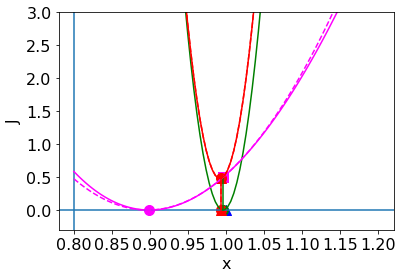

======= Experiment1 =======


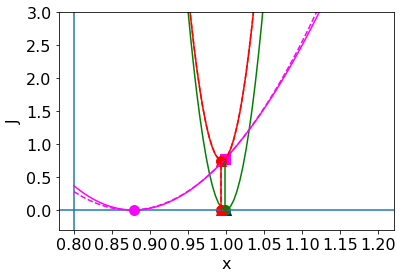

======= Experiment2 =======


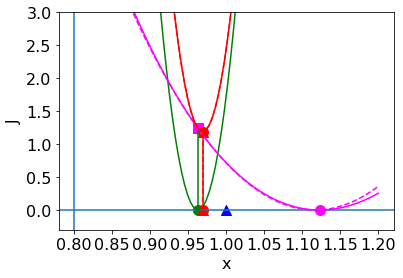

======= Experiment3 =======


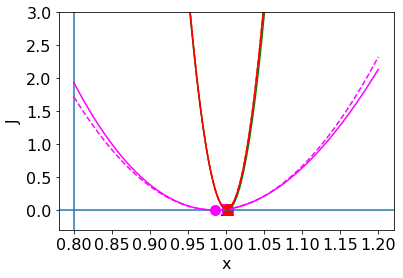

======= Experiment4 =======


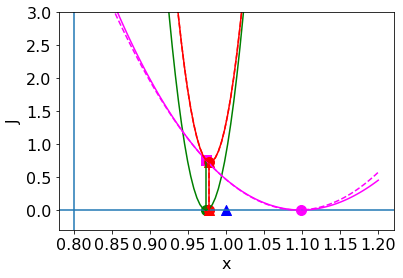

======= Experiment5 =======


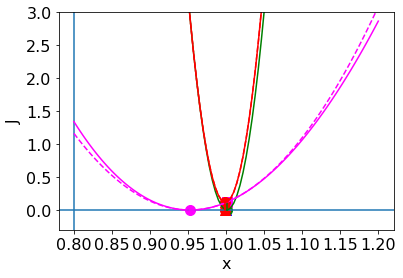

======= Experiment6 =======


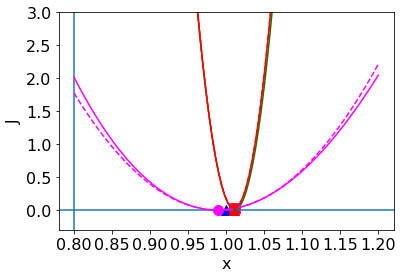

======= Experiment7 =======


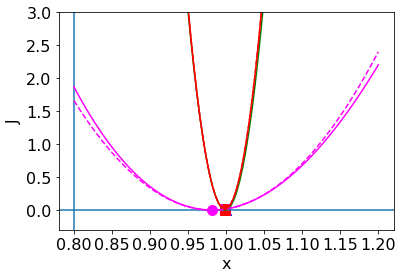

======= Experiment8 =======


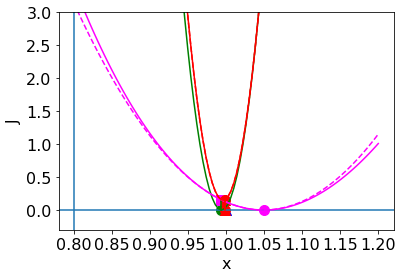

======= Experiment9 =======


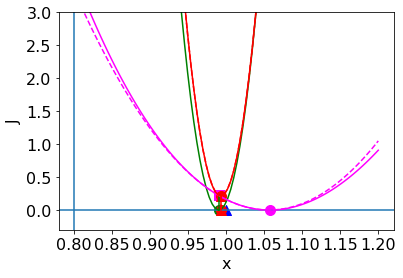

Close all figures to stop the program


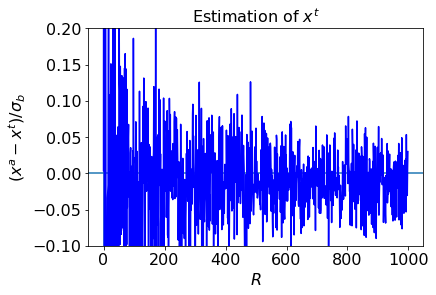

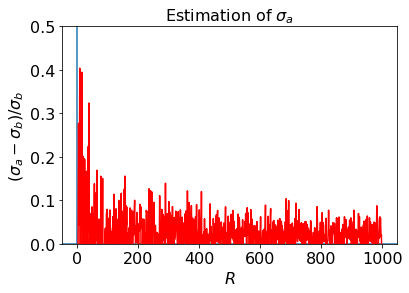

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#True values

xt=1  #True length
yt=2 #True period
g=9.81

def cG_nol(x):
    # Observation operator
    y=2*np.pi*np.sqrt(x/g)
    return y

def G_lin(x):
    # Observation operator
    cGp=np.pi*np.sqrt(1/(x*g))
    return cGp

def inifig(xaxe=0,yaxe=0,xlab='x',ylab='y'):
    plt.figure()
    plt.axvline(xaxe)
    plt.axhline(yaxe)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel(xlab,fontsize=16 )
    plt.ylabel(ylab,fontsize=16)


def Jb_cost(x):
    return (x-xb)**2/(2*sigb**2)
 
def Jr_cost(x):
    return (yo-cG_nol(x))**2/(2*sigr**2)

def Jrinc_cost(x):
    d=yo-cG_nol(xb); G=G_lin(xb)
    return (d-G*(x-xb))**2/(2*sigr**2)

def Jinc_cost(x):
    return Jb_cost(x)+Jrinc_cost(x)

def J_cost(x):
    return Jb_cost(x)+Jr_cost(x)







sigb=0.02;  sigr=0.1; 
print('sig=',sigb,'sigr=',sigr)

# Plotting the cost functions
if True :
    R=10
    xmin=0.8; xmax=1.2; 
    x=np.linspace(xmin,xmax,100)
    for r in range(R):
        # Background and Measurement
        xb=xt+np.random.normal(0,sigb)
        yo=yt+np.random.normal(0,sigr)
        inifig(xaxe=xmin,ylab='J')
        # True state
        plt.scatter(xt,0,marker='^',color='blue',s=100)
        # plotting Jb
        Jb=Jb_cost(x)
        plt.plot(x,Jb,color='green')
        plt.scatter(xb,0,marker='o',color='green',s=100)
        Jb=J_cost(xb)
        plt.scatter(xb,Jb,marker='s',color='green',s=100)
        plt.plot([xb,xb],[0,Jb],color='green')
        # plotting Jr
        Jr=Jr_cost(x)
        plt.plot(x,Jr,color='magenta')
        xo=g*(yo**2/(4*np.pi**2))
        plt.scatter(xo,0,marker='o',color='magenta',s=100)
        # plotting Jrinc
        Jrinc=Jrinc_cost(x)
        Jrincb=Jrinc_cost(xb)
        plt.plot(x,Jrinc,color='magenta',linestyle='dashed')
        plt.scatter(xb,Jrincb,marker='s',color='magenta',s=100)
        # plotting J
        J=J_cost(x)
        ixa=np.argmin(J); xa=x[ixa]; Ja=J[ixa]
        plt.plot(x,J,color='red')
        plt.scatter(xa,Ja,marker='o',color='red',s=100)
        plt.scatter(xa,0,marker='o',color='red',s=100)
        plt.plot([xa,xa],[0,Ja],color='red')
        # plotting Jinc
        Jinc=Jinc_cost(x)
        ixainc=np.argmin(Jinc); xainc=x[ixainc]; 
        Jainc=Jinc_cost(xainc)
        plt.plot(x,Jinc,linestyle='dashed',color='red')
        plt.scatter(xainc,Jainc,marker='^',color='red',s=100)
        plt.scatter(xainc,0,marker='^',color='red',s=100)
        plt.plot([xainc,xainc],[0,Jainc],color='red',linestyle='dashed')
        # Bound and save
        ymin=-.3; ymax=3
        plt.ylim(ymin,ymax) 
        print('======= Experiment'+str(r)+' =======')

      
        plt.savefig('cost'+str(r)+'.pdf')
        plt.show(); plt.close()
    

# Scores for the estimation of sigma_a
if True :
    Rmax=1000; scormea=[]; scorsig=[] 
    
    for R in np.arange(2,Rmax+1) :
        xb=xt+np.random.normal(0,sigb,R)
        yo=yt+np.random.normal(0,sigr,R)
        G=G_lin(xb)
        K=(G/sigr**2)/(1/sigb**2+G**2/sigr**2)
        d=yo-cG_nol(xb)
        xa=xb+K*d
        E=np.sum(xa)/R
        V=np.sum((xa-xt)**2)/R
        sigaR=np.sqrt(V)
        smea=(E-xt)/sigb;
        ssig=(sigb-sigaR)/sigb;
        scormea=np.append(scormea,smea)
        scorsig=np.append(scorsig,ssig)
    # mean
    inifig(xaxe=0,yaxe=0,xlab='$R$',ylab='$(x^a-x^t)/\sigma_b$')
    plt.plot(scormea,color='blue')
    plt.title('Estimation of $x^t$',fontsize=16)
    plt.ylim(-.1,.2)   
    plt.savefig('scormea.pdf')
    # siga
    inifig(xaxe=0,yaxe=0,xlab='$R$',ylab='($\sigma_a-\sigma_b)/\sigma_b$')
    plt.plot(scorsig,color='red')
    plt.title('Estimation of $\sigma_a$',fontsize=16)
    plt.ylim(0,.5)   
    plt.savefig('scorvar.pdf')
    
# Show all figures in command line model
print("Close all figures to stop the program")
plt.show()